In [79]:
#Initialize Modules
import requests as req
import json
from citipy import citipy as cp
import random
import pandas as pd

In [88]:
#API setup
api_key = '25bc90a1196e6f153eece0bc0b0fc9eb'
units = 'Imperial'
url = 'http://api.openweathermap.org/data/2.5/weather'

In [97]:
#Cities Setup - random integers for latitude/longitude
cities_dict = {'city':[],'country':[]}

In [98]:
#Build City Dictionary
for x in range(0,1500):
	x = cp.nearest_city(random.randint(-90,90), random.randint(-180,180))
	if x.city_name not in cities_dict['city']:
		cities_dict['city'].append(x.city_name)
		cities_dict['country'].append(x.country_code)

In [99]:
#Check that code is working
for city in cities_dict['city']:
	print(city)

len(cities_dict['city'])

kodiak
tyup
ugoofaaru
vaini
libreville
kralendijk
goure
attawapiskat
khasan
malbork
yellowknife
punta arenas
ushuaia
saldanha
hobart
khonuu
constitucion
illoqqortoormiut
mokobeng
garowe
ribeira grande
hasaki
mecca
aykhal
honiara
mys shmidta
bredasdorp
bambous virieux
busselton
rikitea
alofi
dongsheng
barrow
hilo
inirida
sergeyevka
clyde river
wanning
kaitangata
lemesos
sao filipe
kununurra
lebu
cidreira
hermanus
semirom
bambanglipuro
takoradi
atuona
kholtoson
port macquarie
mataura
avarua
naze
holetown
narsaq
shima
ruwi
albany
krasnoselkup
cap malheureux
kapaa
ngunguru
tiksi
hambantota
namibe
esperance
upernavik
pevek
torbay
tual
cherskiy
guerrero negro
nouadhibou
laguna
jamestown
soyo
karaul
portland
komsomolskiy
bulawayo
thyolo
vestmannaeyjar
sorsk
saint-pierre
olinda
sukabumi
policoro
saint-philippe
linxia
ostrovnoy
port elizabeth
chuy
westport
vostok
brae
provost
cabo san lucas
sayyan
kahului
irara
waki
luocheng
belushya guba
padang
qaanaaq
bheramara
katakwi
vaitupu
nikolskoye
otau

616

In [100]:
#Change dict to DataFrame
df_cities = pd.DataFrame.from_dict(cities_dict)
df_cities['lon'] = ''
df_cities['lat']= ''
df_cities['tempF']= ''
df_cities['humidity'] = ''
df_cities['wind_speed'] = ''
df_cities['cloudiness'] = ''

df_cities.head()

,city,country,lon,lat,tempF,humidity,wind_speed,cloudiness
0,kodiak,us,,,,,,
1,tyup,kg,,,,,,
2,ugoofaaru,mv,,,,,,
3,vaini,to,,,,,,
4,libreville,ga,,,,,,


In [102]:
#Building API Call
for index,row in df_cities.iterrows():

	#Set param_dict
	param_dict = {'appid':api_key,
			'units':units, 
			'q': row['city']+','+row['country']
	}
	
	#Get response
	response = req.get(url,params = param_dict)
	print('Processing '+ str(index+1) + ' of ' +str(len(df_cities['city'])) + ' | ' + 
		row['city']+','+row['country'])
	print(response.url)
	data = response.json()
	#print(json.dumps(data,indent=4))
	
	try:
		#Create dictionary key-value pairs
		row['lon'] = data['coord']['lon']
		row['lat'] = data['coord']['lat']
		row['tempF'] = data['main']['temp_max']
		row['humidity'] = data['main']['humidity']
		row['wind_speed'] = data['wind']['speed']
		row['cloudiness'] = data['clouds']['all']
	except:
		continue

#Check Dataframe structure
df_cities.head()

Processing 1 of 616 | kodiak,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kodiak%2Cus
Processing 2 of 616 | tyup,kg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tyup%2Ckg
Processing 3 of 616 | ugoofaaru,mv
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ugoofaaru%2Cmv
Processing 4 of 616 | vaini,to
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=vaini%2Cto
Processing 5 of 616 | libreville,ga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=libreville%2Cga
Processing 6 of 616 | kralendijk,an
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kralendijk%2Can
Processing 7 of 616 | goure,ne
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153e

Processing 55 of 616 | holetown,bb
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=holetown%2Cbb
Processing 56 of 616 | narsaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=narsaq%2Cgl
Processing 57 of 616 | shima,cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=shima%2Ccn
Processing 58 of 616 | ruwi,om
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ruwi%2Com
Processing 59 of 616 | albany,au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=albany%2Cau
Processing 60 of 616 | krasnoselkup,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=krasnoselkup%2Cru
Processing 61 of 616 | cap malheureux,mu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1

Processing 111 of 616 | otautau,nz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=otautau%2Cnz
Processing 112 of 616 | lompoc,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lompoc%2Cus
Processing 113 of 616 | mazsalaca,lv
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mazsalaca%2Clv
Processing 114 of 616 | cape town,za
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=cape+town%2Cza
Processing 115 of 616 | aklavik,ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=aklavik%2Cca
Processing 116 of 616 | jiroft,ir
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=jiroft%2Cir
Processing 117 of 616 | ponta do sol,cv
http://api.openweathermap.org/data/2.5/weather?app

Processing 165 of 616 | butterworth,za
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=butterworth%2Cza
Processing 166 of 616 | belmonte,br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=belmonte%2Cbr
Processing 167 of 616 | san jose de guanipa,ve
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=san+jose+de+guanipa%2Cve
Processing 168 of 616 | hithadhoo,mv
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hithadhoo%2Cmv
Processing 169 of 616 | ejura,gh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ejura%2Cgh
Processing 170 of 616 | butaritari,ki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=butaritari%2Cki
Processing 171 of 616 | east london,za
http://api.open

Processing 221 of 616 | qianan,cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=qianan%2Ccn
Processing 222 of 616 | dera bugti,pk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=dera+bugti%2Cpk
Processing 223 of 616 | sitka,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sitka%2Cus
Processing 224 of 616 | taoudenni,ml
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=taoudenni%2Cml
Processing 225 of 616 | mananara,mg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mananara%2Cmg
Processing 226 of 616 | tasiilaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tasiilaq%2Cgl
Processing 227 of 616 | ornes,no
http://api.openweathermap.org/data/2.5/weather?appid=

Processing 275 of 616 | sola,vu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sola%2Cvu
Processing 276 of 616 | longyearbyen,sj
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=longyearbyen%2Csj
Processing 277 of 616 | kasongo-lunda,cd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kasongo-lunda%2Ccd
Processing 278 of 616 | kavaratti,in
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kavaratti%2Cin
Processing 279 of 616 | saint-joseph,re
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saint-joseph%2Cre
Processing 280 of 616 | bluff,nz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bluff%2Cnz
Processing 281 of 616 | margate,za
http://api.openweathermap.org/dat

Processing 328 of 616 | santo tomas,pe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=santo+tomas%2Cpe
Processing 329 of 616 | kamaishi,jp
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kamaishi%2Cjp
Processing 330 of 616 | wainwright,ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=wainwright%2Cca
Processing 331 of 616 | satitoa,ws
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=satitoa%2Cws
Processing 332 of 616 | vila,vu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=vila%2Cvu
Processing 333 of 616 | delvine,al
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=delvine%2Cal
Processing 334 of 616 | bathurst,ca
http://api.openweathermap.org/data/2.5/weather?a

Processing 382 of 616 | klaksvik,fo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=klaksvik%2Cfo
Processing 383 of 616 | samusu,ws
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=samusu%2Cws
Processing 384 of 616 | batagay,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=batagay%2Cru
Processing 385 of 616 | kawardha,in
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kawardha%2Cin
Processing 386 of 616 | batie,bf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=batie%2Cbf
Processing 387 of 616 | sovetskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sovetskiy%2Cru
Processing 388 of 616 | stoyba,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc9

Processing 437 of 616 | toliary,mg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=toliary%2Cmg
Processing 438 of 616 | sirsa,in
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sirsa%2Cin
Processing 439 of 616 | vredendal,za
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=vredendal%2Cza
Processing 440 of 616 | eten,pe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=eten%2Cpe
Processing 441 of 616 | dicabisagan,ph
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=dicabisagan%2Cph
Processing 442 of 616 | ossora,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ossora%2Cru
Processing 443 of 616 | lere,ng
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a11

Processing 491 of 616 | kiunga,pg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kiunga%2Cpg
Processing 492 of 616 | olafsvik,is
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=olafsvik%2Cis
Processing 493 of 616 | bone,id
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bone%2Cid
Processing 494 of 616 | gangotri,in
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=gangotri%2Cin
Processing 495 of 616 | ninh binh,vn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ninh+binh%2Cvn
Processing 496 of 616 | port-gentil,ga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=port-gentil%2Cga
Processing 497 of 616 | iquique,cl
http://api.openweathermap.org/data/2.5/weather?appi

Processing 545 of 616 | ballina,au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ballina%2Cau
Processing 546 of 616 | rawson,ar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=rawson%2Car
Processing 547 of 616 | artesia,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=artesia%2Cus
Processing 548 of 616 | umzimvubu,za
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=umzimvubu%2Cza
Processing 549 of 616 | berdigestyakh,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=berdigestyakh%2Cru
Processing 550 of 616 | husavik,is
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=husavik%2Cis
Processing 551 of 616 | ambodifototra,mg
http://api.openweathermap.org/data/2.5/

Processing 599 of 616 | lyuban,by
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lyuban%2Cby
Processing 600 of 616 | ocampo,mx
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ocampo%2Cmx
Processing 601 of 616 | vieux-habitants,gp
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=vieux-habitants%2Cgp
Processing 602 of 616 | tsogni,ga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tsogni%2Cga
Processing 603 of 616 | verkhoyansk,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=verkhoyansk%2Cru
Processing 604 of 616 | jingdezhen,cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=jingdezhen%2Ccn
Processing 605 of 616 | madang,pg
http://api.openweathermap.org/data/2

,city,country,lon,lat,tempF,humidity,wind_speed,cloudiness
0,kodiak,us,-152.41,57.79,41,93,38.03,90
1,tyup,kg,78.36,42.73,-5.21,63,1.81,0
2,ugoofaaru,mv,73,5.67,81.37,100,4.94,76
3,vaini,to,-175.2,-21.2,82.4,74,3.36,20
4,libreville,ga,9.45,0.39,73.4,100,13.87,75


In [124]:
#Save Data into CSV
df_cities_clean = df_cities.loc[df_cities['lon']!='']
df_cities_clean.to_csv('Cities_Data.csv',index=False)
df_cities_clean.head()

,city,country,lon,lat,tempF,humidity,wind_speed,cloudiness
0,kodiak,us,-152.41,57.79,41,93,38.03,90
1,tyup,kg,78.36,42.73,-5.21,63,1.81,0
2,ugoofaaru,mv,73,5.67,81.37,100,4.94,76
3,vaini,to,-175.2,-21.2,82.4,74,3.36,20
4,libreville,ga,9.45,0.39,73.4,100,13.87,75


In [141]:
#Initialize modules for plots
import matplotlib.pyplot as plt
import seaborn as sns

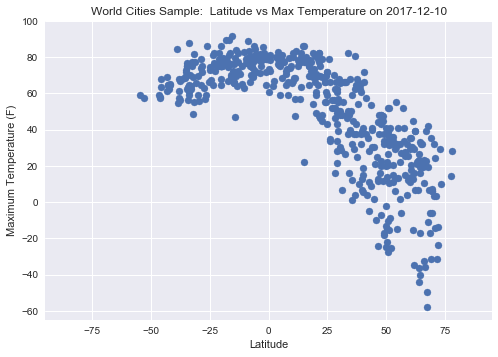

In [146]:
#Plot Latitude vs Temperature (F) w Latitude being the independent variable

plt.scatter(df_cities_clean['lat'],df_cities_clean['tempF'])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('World Cities Sample:  Latitude vs Max Temperature on 2017-12-10')
plt.xlim(-95,95)
plt.ylim(-65,100)
plt.savefig('Lat_vs_Temp_20171210')
plt.show()

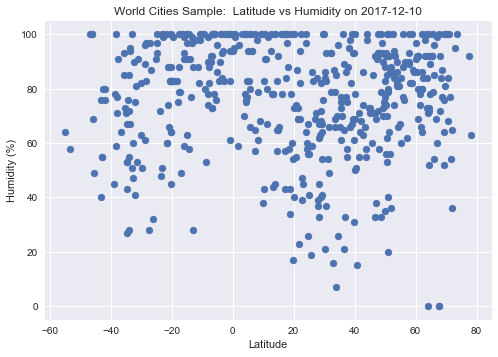

In [143]:
#Plot Latitude vs Humidity (%) w Latitude being the independent variable

plt.scatter(df_cities_clean['lat'],df_cities_clean['humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('World Cities Sample:  Latitude vs Humidity on 2017-12-10')
#plt.xlim(-95,95)
#plt.ylim(-150,150)
plt.savefig('Lat_vs_Humidity_20171210')
plt.show()

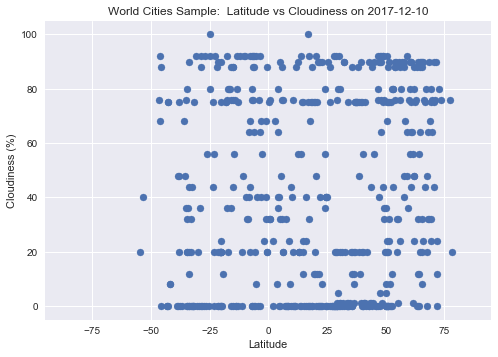

In [144]:
#Plot Latitude vs Cloudiness (%) w Latitude being the independent variable

plt.scatter(df_cities_clean['lat'],df_cities_clean['cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('World Cities Sample:  Latitude vs Cloudiness on 2017-12-10')
plt.xlim(-95,95)
#plt.ylim(-150,150)
plt.savefig('Lat_vs_Cloud_20171210')
plt.show()

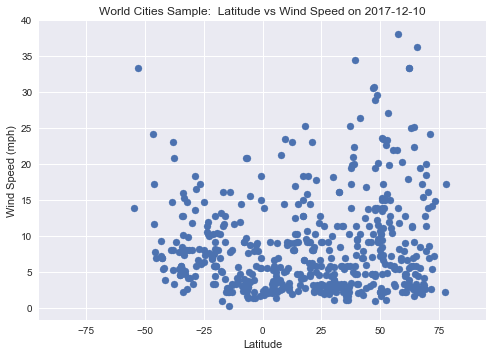

In [145]:
#Plot Latitude vs Cloudiness (%) w Latitude being the independent variable

plt.scatter(df_cities_clean['lat'],df_cities_clean['wind_speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('World Cities Sample:  Latitude vs Wind Speed on 2017-12-10')
plt.xlim(-95,95)
#plt.ylim(-150,150)
plt.savefig('Lat_vs_Wind_20171210')
plt.show()